In [ ]:
## Import necessary packages
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
## Store data in Pandas Dataframe
url = 'http://ddinter.scbdd.com/static/media/download/ddinter_downloads_code_L.csv'
ddi_data = pd.read_csv(url) 
ddi_data
## Data: Drug-Drug Interactions involving antineoplastic (cancer treating) and immunomodulating (affecting the immune system) agents drugs	

DDInterID_A                         Drug_A DDInterID_B  \
0       DDInter127  Asparaginase Escherichia coli    DDInter1   
1         DDInter1                       Abacavir  DDInter228   
2         DDInter1                       Abacavir  DDInter262   
3       DDInter392                     Cladribine    DDInter1   
4       DDInter405                    Clofarabine    DDInter1   
...            ...                            ...         ...   
65384   DDInter667                      Erlotinib  DDInter766   
65385   DDInter789                    Fulvestrant  DDInter766   
65386  DDInter1156                 Mercaptopurine  DDInter766   
65387   DDInter810                      Gefitinib  DDInter888   
65388  DDInter1735                     Tacrolimus  DDInter888   

                        Drug_B     Level  
0                     Abacavir  Moderate  
1          Brentuximab vedotin  Moderate  
2                 Cabozantinib  Moderate  
3                     Abacavir  Moderate  
4                     Abacavir  Moderate  
...                        ...       ...  
65384              Fluticasone   Unknown  
65385              Fluticasone   Unknown  
65386              Fluticasone   Unknown  
65387  Hydrocortisone butyrate   Unknown  
65388  Hydrocortisone butyrate   Unknown  

[65389 rows x 5 columns]

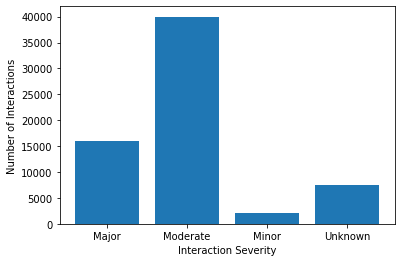

In [ ]:
## Create a bar chart that shows how many interactions of each type/severity there are
levels = []
for x in ddi_data['Level']:
  levels.append(x)
bars = ['Major', 'Moderate', 'Minor', 'Unknown']
heights = [levels.count('Major'), levels.count('Moderate'), levels.count('Minor'), levels.count('Unknown')]
plt.bar(bars, heights)
plt.xlabel('Interaction Severity')
plt.ylabel('Number of Interactions')
plt.show()

In [ ]:
## Create node list - each drug in the dataset is a node, so create a list of the unique drug names from the two drug name columns
drugs_a_unique = ddi_data['Drug_A'].unique()
drugs_b_unique = ddi_data['Drug_B'].unique()
all_drugs = []
for x in drugs_a_unique: 
  all_drugs.append(x)
for x in drugs_b_unique: 
  all_drugs.append(x)
all_drugs_df = pd.DataFrame(all_drugs, columns = ['Drug Name'])
drugs_unique = all_drugs_df['Drug Name'].unique()

In [ ]:
## Create list of weighted edges to signify interactions and give greater importance to more severe interactions

interacting_drugs = ddi_data[ddi_data['Level'] != 'Unknown']

weights = []
for x in interacting_drugs['Level']:
  if x == 'Major':
    weights.append(3)
  elif x == 'Moderate':
    weights.append(2)
  elif x == 'Minor':
    weights.append(1)

drug_edges = [
                 [x, y, z] for x, y, z
                 in zip(interacting_drugs['Drug_A'], 
                        interacting_drugs['Drug_B'], 
                        weights)
                 ]

print(drug_edges[57975])

['Muromonab', 'Zinc gluconate', 1]


In [ ]:
interacting_drugs

DDInterID_A                         Drug_A  DDInterID_B  \
0       DDInter127  Asparaginase Escherichia coli     DDInter1   
1         DDInter1                       Abacavir   DDInter228   
2         DDInter1                       Abacavir   DDInter262   
3       DDInter392                     Cladribine     DDInter1   
4       DDInter405                    Clofarabine     DDInter1   
...            ...                            ...          ...   
57971  DDInter1144                      Melphalan  DDInter1964   
57972  DDInter1250                      Muromonab  DDInter1964   
57973   DDInter623                     Efalizumab  DDInter1965   
57974  DDInter1144                      Melphalan  DDInter1965   
57975  DDInter1250                      Muromonab  DDInter1965   

                    Drug_B     Level  
0                 Abacavir  Moderate  
1      Brentuximab vedotin  Moderate  
2             Cabozantinib  Moderate  
3                 Abacavir  Moderate  
4                 Abacavir  Moderate  
...                    ...       ...  
57971        Zinc chloride     Minor  
57972        Zinc chloride     Minor  
57973       Zinc gluconate     Minor  
57974       Zinc gluconate     Minor  
57975       Zinc gluconate     Minor  

[57976 rows x 5 columns]

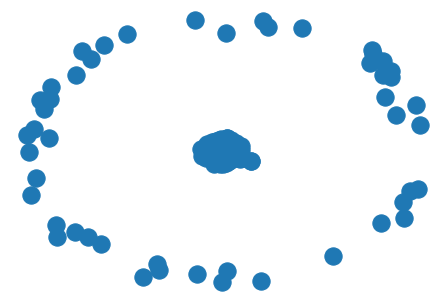

In [ ]:
## Create weighted Networkx graph
G = nx.Graph()
G.add_nodes_from(drugs_unique)
G.add_weighted_edges_from(drug_edges)
nx.draw(G)

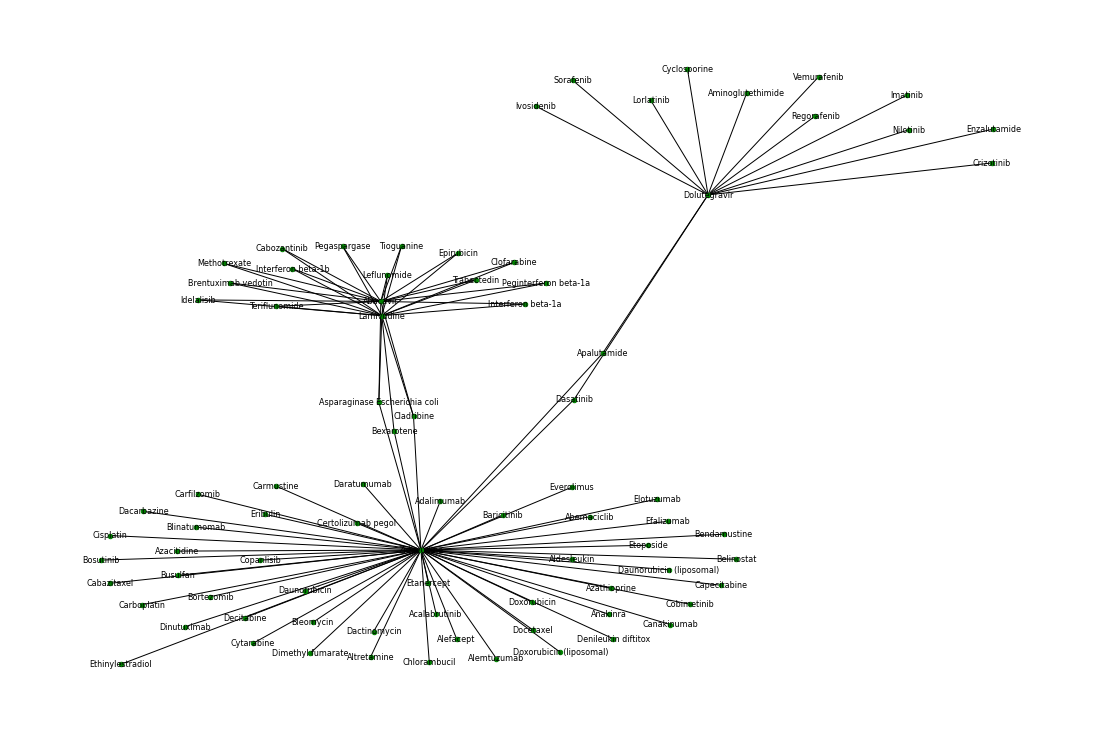

In [ ]:
## A closeup graph showing a subset of the data
small_drug_edges = drug_edges[:100]
plt.figure(figsize=(15,10))
H = nx.Graph()
H.add_weighted_edges_from(small_drug_edges)
nx.draw(H, with_labels = True, font_size = 8, node_size = 20, node_color = 'green')

In [ ]:
## The degree of a node/drug shows how many interactions it is inolved in
## This creates a list of the degrees of all the drugs
degrees = []
for node in G.nodes():
  degree = G.degree(node)
  degrees.append(degree)

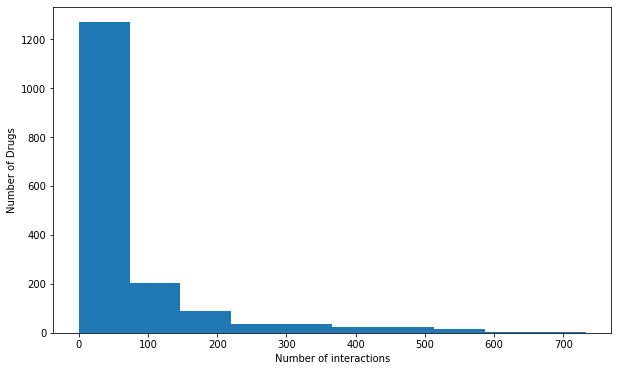

In [ ]:
## Creating a histogram showing how many drugs have a degree within a certain range
plt.figure(figsize=(10,6))
plt.hist(degrees)
plt.xlabel('Number of interactions')
plt.ylabel('Number of Drugs')
plt.show()

In [ ]:
## node2vec is an algorithmic framework for representational learning on graphs. 
## Given any graph, it can learn continuous feature representations for the nodes, which can then be used for various downstream machine learning tasks. 
!pip install node2vec
from node2vec import Node2Vec

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5980 sha256=526009f200c452f723dbf594f682488105797e5b1751cd38344b181c3af2a486
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


In [ ]:
## Employ Node2Vec on the weighted graph
## Parameters indicate to create an array with 50 components based on 5 walks each with a length of 80 for each node/drug
node2vec = Node2Vec(G, dimensions=50, num_walks=5)

Computing transition probabilities:   0%|          | 0/1699 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 5/5 [01:10<00:00, 14.16s/it]


In [ ]:
## Fit the walks to a model using skipgram/Word2Vec
model = node2vec.fit()
print(model)

Word2Vec(vocab=1699, size=50, alpha=0.025)


In [ ]:
## Translate to a dataframe of the vectors/arrays that we can use in the model
emb_df = (
    pd.DataFrame(
        [model.wv.get_vector(str(n)) for n in G.nodes()],
        index = G.nodes
    )
)

In [ ]:
emb_df

0         1         2         3   \
Asparaginase Escherichia coli  0.185221  0.567346  0.674511  0.005170   
Abacavir                       0.168371  0.343424  0.829643 -0.046583   
Cladribine                     0.673969  0.160914  0.443308 -0.027527   
Clofarabine                    0.508430  0.743199  0.625509  0.050098   
Epirubicin                     0.470202  0.393080  0.483102 -0.026039   
...                                 ...       ...       ...       ...   
Econazole                     -0.007159  0.002080 -0.005930 -0.002059   
Flumazenil                    -0.004000  0.004070 -0.001342 -0.006373   
Calcipotriol                  -0.004899 -0.002545 -0.005812 -0.003740   
gamma-Aminobutyric acid        0.008901 -0.006958  0.003722 -0.006849   
Galactose                      0.005934 -0.005660  0.002842 -0.002557   

                                     4         5         6         7   \
Asparaginase Escherichia coli  0.308194 -0.213605 -0.249175 -0.143338   
Abacavir                       0.675025 -0.030379 -0.169515  0.123641   
Cladribine                     0.191206 -0.412971 -0.115618  0.430367   
Clofarabine                    0.183589  0.076611  0.138411  0.178386   
Epirubicin                     0.154657  0.107827 -0.155148 -0.023473   
...                                 ...       ...       ...       ...   
Econazole                      0.000682  0.006498 -0.001977 -0.007419   
Flumazenil                     0.008280  0.003500 -0.009506  0.001195   
Calcipotriol                   0.008134  0.007980  0.004105  0.009515   
gamma-Aminobutyric acid       -0.006371  0.004828  0.007305 -0.006572   
Galactose                     -0.009590 -0.001835 -0.009692 -0.005093   

                                     8         9   ...        40        41  \
Asparaginase Escherichia coli -0.296620  0.275061  ... -0.384765 -0.319495   
Abacavir                      -0.225371  0.357669  ... -0.070973 -0.234949   
Cladribine                    -0.083395 -0.084180  ...  0.402576  0.280562   
Clofarabine                   -0.060637  0.469809  ... -0.263297  0.292450   
Epirubicin                    -0.172095 -0.047861  ... -0.276557  0.800761   
...                                 ...       ...  ...       ...       ...   
Econazole                     -0.006184 -0.004861  ...  0.007146  0.008203   
Flumazenil                    -0.002467  0.004310  ...  0.004255 -0.004079   
Calcipotriol                   0.004827  0.004331  ...  0.009248 -0.000852   
gamma-Aminobutyric acid       -0.000850 -0.005646  ... -0.001465  0.004234   
Galactose                      0.009555  0.001677  ...  0.008130 -0.007736   

                                     42        43        44        45  \
Asparaginase Escherichia coli -0.041998 -0.135278  0.269462 -0.011299   
Abacavir                      -0.404266 -0.054551  0.086884 -0.396977   
Cladribine                     0.210763  0.042833 -0.098426 -0.034978   
Clofarabine                    0.087574 -0.201527  0.332375 -0.283149   
Epirubicin                    -0.455848  0.354294  0.351380 -0.541147   
...                                 ...       ...       ...       ...   
Econazole                      0.005819 -0.008053  0.009312 -0.008140   
Flumazenil                    -0.002947  0.004720  0.000688 -0.007707   
Calcipotriol                  -0.003990 -0.003152  0.006445 -0.000132   
gamma-Aminobutyric acid       -0.006239  0.004411 -0.007323  0.005709   
Galactose                     -0.003070 -0.003280  0.009806 -0.001865   

                                     46        47        48        49  
Asparaginase Escherichia coli -0.186888 -0.396625  0.004587  0.251120  
Abacavir                       0.104153 -0.837204  0.171304  0.124411  
Cladribine                     0.023957 -0.546497  0.148046  0.080692  
Clofarabine                   -0.225414 -0.570141  0.424505  0.023302  
Epirubicin                    -0.144237 -0.561911  0.137560 -0.105743  
...                                 .

In [ ]:
## This is the function used to call a row and convert it to a numpy array
emb_df.loc['Abacavir'].to_numpy()

array([ 0.16837107,  0.34342426,  0.8296431 , -0.04658334,  0.675025  ,
       -0.0303793 , -0.16951515,  0.12364061, -0.22537057,  0.35766932,
       -0.01326377, -0.3653128 , -0.18588582, -0.19946392,  0.2391613 ,
        0.08375733,  0.18440817,  0.66504353, -0.19231428,  0.13570288,
        0.12044371,  0.00099091,  0.11498822, -0.00705735, -0.1554936 ,
        0.42628437,  0.05785851, -0.18191229, -0.00461146,  0.14935565,
        0.16588414,  0.1508665 ,  0.15126897, -0.32574955,  0.04389458,
        0.50806653,  0.42960116,  0.09609263,  0.02607326,  0.10794222,
       -0.07097282, -0.23494905, -0.40426564, -0.05455106,  0.08688363,
       -0.3969767 ,  0.10415304, -0.83720434,  0.17130359,  0.12441058],
      dtype=float32)

In [ ]:
## Creating an X-matrix for use in the model with the embeddings of each drug pair
drug_pairs = [[x, y] for x, y in zip(ddi_data['Drug_A'], ddi_data['Drug_B'])]
X = []
for x, y in zip(ddi_data['Drug_A'], ddi_data['Drug_B']):
  emb_con = np.concatenate((emb_df.loc[x].to_numpy(), emb_df.loc[y].to_numpy()))
  X.append(emb_con)
## I originally had them in a list, but this wasn't accepted in the models since the array dimension was 3 not 2, so I concatenated the 2 embeddings

In [ ]:
X

[array([ 0.18522109,  0.567346  ,  0.67451066,  0.00516969,  0.3081939 ,
        -0.21360499, -0.24917531, -0.14333783, -0.2966201 ,  0.2750605 ,
         0.05847653, -0.01330614, -0.22143635,  0.03617488, -0.06076055,
         0.6736542 ,  0.18026902,  0.35924184, -0.4196778 , -0.12856352,
        -0.40279216, -0.01462344,  0.45489112,  0.1986877 , -0.37383044,
         0.45191956, -0.20894107, -0.54993457,  0.28682745,  0.7395015 ,
         0.27409515,  0.3580086 , -0.0493208 , -0.21334414,  0.38992885,
         0.14914922,  0.42041445, -0.15647535,  0.29987678, -0.4015971 ,
        -0.3847648 , -0.31949508, -0.04199761, -0.13527775,  0.2694624 ,
        -0.01129859, -0.18688832, -0.39662454,  0.00458745,  0.25111997,
         0.16837107,  0.34342426,  0.8296431 , -0.04658334,  0.675025  ,
        -0.0303793 , -0.16951515,  0.12364061, -0.22537057,  0.35766932,
        -0.01326377, -0.3653128 , -0.18588582, -0.19946392,  0.2391613 ,
         0.08375733,  0.18440817,  0.66504353, -0.1

In [ ]:
## Create a y-matrix with whether the two have a known interaction (1 = yes, 0 = no)
y_1 = []
for x in ddi_data['Level']:
  if x != 'Unknown':
    y_1.append(1)
  else:
    y_1.append(0)


In [ ]:
y_1

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [ ]:
## Create X matrix with only interacting drugs' embeddings
X_int = []
for x, y in zip(interacting_drugs['Drug_A'], interacting_drugs['Drug_B']):
  emb_con_2 = np.concatenate((emb_df.loc[x].to_numpy(), emb_df.loc[y].to_numpy()))
  X_int.append(emb_con_2)

## I originally had them in a list, but this wasn't accepted in the models, so I concatenated the 2 embeddings

In [ ]:
X_int

[array([ 0.18522109,  0.567346  ,  0.67451066,  0.00516969,  0.3081939 ,
        -0.21360499, -0.24917531, -0.14333783, -0.2966201 ,  0.2750605 ,
         0.05847653, -0.01330614, -0.22143635,  0.03617488, -0.06076055,
         0.6736542 ,  0.18026902,  0.35924184, -0.4196778 , -0.12856352,
        -0.40279216, -0.01462344,  0.45489112,  0.1986877 , -0.37383044,
         0.45191956, -0.20894107, -0.54993457,  0.28682745,  0.7395015 ,
         0.27409515,  0.3580086 , -0.0493208 , -0.21334414,  0.38992885,
         0.14914922,  0.42041445, -0.15647535,  0.29987678, -0.4015971 ,
        -0.3847648 , -0.31949508, -0.04199761, -0.13527775,  0.2694624 ,
        -0.01129859, -0.18688832, -0.39662454,  0.00458745,  0.25111997,
         0.16837107,  0.34342426,  0.8296431 , -0.04658334,  0.675025  ,
        -0.0303793 , -0.16951515,  0.12364061, -0.22537057,  0.35766932,
        -0.01326377, -0.3653128 , -0.18588582, -0.19946392,  0.2391613 ,
         0.08375733,  0.18440817,  0.66504353, -0.1

In [ ]:
## Create a y-matrix with the level of interaction
y_level = []
for x in interacting_drugs['Level']:
  y_level.append(x)

In [ ]:
y_level

['Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Major',
 'Moderate',
 'Moderate',
 'Moderate',
 'Major',
 'Moderate',
 'Moderate',
 'Minor',
 'Major',
 'Moderate',
 'Major',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Minor',
 'Minor',
 'Minor',
 'Minor',
 'Moderate',
 'Moderate',
 'Minor',
 'Moderate',
 'Moderate',
 'Minor',
 'Major',
 'Minor',
 'Moderate',
 'Minor',
 'Moderate',
 'Moderate',
 'Minor',
 'Minor',
 'Major',
 'Moderate',
 'Moderate',
 'Minor',
 'Moderate',
 'Moderate',
 'Major',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Major',
 'Moderate',
 'Moderate',
 'Major',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Major',
 'Moderate',
 'Moderate',
 'Major',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'M

In [ ]:
## Split data into training and testing - whether or not have known interaction
X_train,X_test,y_1_train,y_1_test = train_test_split(X, y_1, test_size = 0.3, random_state=0)

In [ ]:
## Split data into training and testing - level of known interaction
X_int_train,X_int_test,y_level_train,y_level_test = train_test_split(X_int, y_level, test_size = 0.3, random_state=0)

In [ ]:
## Import models to test
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
## Import testing metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
## The following 4 cells have models for Q1, predicting whether or not a known interaction exists

In [ ]:
## Logistic Regression Model
log = LogisticRegression()
log.fit(X_train, y_1_train)
predictions = log.predict(X_test)
score = accuracy_score(y_1_test, predictions)
print('The accuracy for the logistic regression model is: ' + str(score))

The accuracy for the logistic regression model is: 0.9205281133710557


In [ ]:
## K Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_1_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_1_test, predictions)
print('The accuracy for the KNN model is: ' + str(score))

The accuracy for the KNN model is: 0.9713004027119335


In [ ]:
## Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_1_train)
predictions = dt.predict(X_test)
score = accuracy_score(y_1_test, predictions)
print('The accuracy for the Decision Tree model is: ' + str(score))

The accuracy for the Decision Tree model is: 0.9063567314064332


In [ ]:
## MLP Classifer, a simple neural network
mlp = MLPClassifier(alpha=1,max_iter=1000)
mlp.fit(X_train, y_1_train)
predictions = mlp.predict(X_test)
score = accuracy_score(y_1_test, predictions)
print('The accuracy for the MLP model is: ' + str(score))

The accuracy for the MLP model is: 0.9420400672885763


In [ ]:
## The following cells have models for Q2, predicting the severity of interactions
## Following the cell creating each of the 4 models is a cell with various metrics then a cell visualizing the confusion matrix for the model

In [ ]:
## Logistic Regression Model
log = LogisticRegression(max_iter=1000)
log.fit(X_int_train, y_level_train)
predictions = log.predict(X_int_test)

In [ ]:
## LR Metrics
score = accuracy_score(y_level_test, predictions)
print('LR Accuracy: ' + str(score))
precision = precision_score(y_level_test, predictions, average=None)
print('LR Precision: ' + str(precision))
recall = recall_score(y_level_test, predictions, average=None)
print('LR Recall: ' + str(recall))

LR Accuracy: 0.7377105732191112
LR Precision: [0.65088757 0.73913043 0.75267061]
LR Recall: [0.33985582 0.19572368 0.92724225]


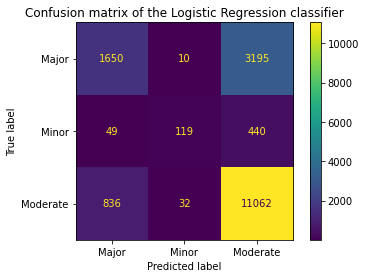

In [ ]:
## LR Confusion Matrix
con_mat = confusion_matrix(y_level_test, predictions)
disp = ConfusionMatrixDisplay(con_mat, display_labels = log.classes_)
disp.plot()
plt.title('Confusion matrix of the Logistic Regression classifier')
plt.show()

In [ ]:
## K Nearest Neighbors Model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_int_train, y_level_train)
predictions = knn.predict(X_int_test)

In [ ]:
## KNN Metrics
score = accuracy_score(y_level_test, predictions)
print('KNN Accuracy: ' + str(score))
precision = precision_score(y_level_test, predictions, average=None)
print('KNN Precision: ' + str(precision))
recall = recall_score(y_level_test, predictions, average=None)
print('KNN Recall: ' + str(recall))
f1 = f1_score(y_level_test, predictions, average=None)
print('KNN F1 score: ' + str(f1))

KNN Accuracy: 0.8293566377278215
KNN Precision: [0.72567682 0.835141   0.86930515]
KNN Recall: [0.70669413 0.63322368 0.88927075]
KNN F1 score: [0.71605969 0.72029935 0.87917461]


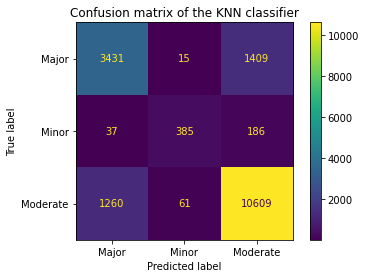

In [ ]:
## KNN Confusion Matrix
con_mat = confusion_matrix(y_level_test, predictions)
disp = ConfusionMatrixDisplay(con_mat, display_labels = knn.classes_)
disp.plot()
plt.title('Confusion matrix of the KNN classifier')
plt.show()

In [ ]:
## Decision Tree Model
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_int_train, y_level_train)
predictions = dt.predict(X_int_test)

In [ ]:
## DT Metrics
score = accuracy_score(y_level_test, predictions)
print('Decision Tree Accuracy: ' + str(score))
precision = precision_score(y_level_test, predictions, average=None)
print('Decision Tree Precision: ' + str(precision))
recall = recall_score(y_level_test, predictions, average=None)
print('Decision Tree Recall: ' + str(recall))

Decision Tree Accuracy: 0.736043235784511
Decision Tree Precision: [0.79527559 0.83636364 0.73050624]
Decision Tree Recall: [0.22883625 0.07565789 0.97611065]


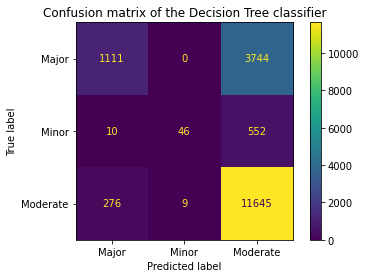

In [ ]:
## DT Confusion Matrix
con_mat = confusion_matrix(y_level_test, predictions)
disp = ConfusionMatrixDisplay(con_mat, display_labels = dt.classes_)
disp.plot()
plt.title('Confusion matrix of the Decision Tree classifier')
plt.show()

In [ ]:
## MLP Model
mlp = MLPClassifier(alpha=0.001,max_iter=1000)
mlp.fit(X_int_train, y_level_train)
predictions = mlp.predict(X_int_test)

In [ ]:
## MLP Metrics
score = accuracy_score(y_level_test, predictions)
print('MLP Accuracy: ' + str(score))
precision = precision_score(y_level_test, predictions, average=None)
print('MLP Precision: ' + str(precision))
recall = recall_score(y_level_test, predictions, average=None)
print('MLP Recall: ' + str(recall))

MLP Accuracy: 0.9162306675099178
MLP Precision: [0.87599754 0.7358156  0.94121588]
MLP Recall: [0.88177137 0.68256579 0.94216262]


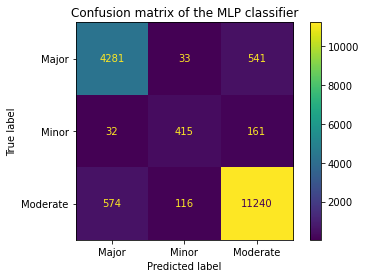

In [ ]:
## MLP Confusion Matrix
con_mat = confusion_matrix(y_level_test, predictions)
disp = ConfusionMatrixDisplay(con_mat, display_labels = mlp.classes_)
disp.plot()
plt.title('Confusion matrix of the MLP classifier')
plt.show()

In [ ]:
## Support Vector Model
svm = SVC()
svm.fit(X_int_train, y_level_train)
predictions = svm.predict(X_int_test)

In [ ]:
## SVM Metrics
score = accuracy_score(y_level_test, predictions)
print('SVM Accuracy: ' + str(score))
precision = precision_score(y_level_test, predictions, average=None)
print('SVM Precision: ' + str(precision))
recall = recall_score(y_level_test, predictions, average=None)
print('SVM Recall: ' + str(recall))

SVM Accuracy: 0.8885758638532743
SVM Precision: [0.90676463 0.96507937 0.88127332]
SVM Recall: [0.73717817 0.5        0.96999162]


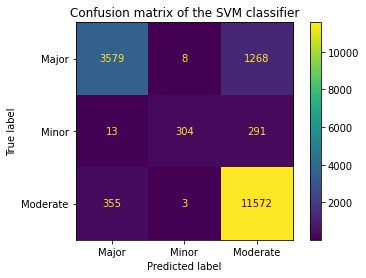

In [ ]:
## SVM Confusion Matrix
con_mat = confusion_matrix(y_level_test, predictions)
disp = ConfusionMatrixDisplay(con_mat, display_labels = svm.classes_)
disp.plot()
plt.title('Confusion matrix of the SVM classifier')
plt.show()